In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/parkseongtae/Desktop/python/LMS'

In [3]:
cd /Users/'parkseongtae'/Desktop/Python/LMS

/Users/parkseongtae/Desktop/python/LMS


In [4]:
card_df = pd.read_csv('fraud.csv')

In [5]:
pd.set_option('display.max_columns', 50)

In [6]:
card_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [7]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [8]:
#결측치 처리 
card_df.isna().mean()

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

## 분석에 필요없는 데이터 drop하기 

개인정보에 대한 내용들은 신용카드 이상감지와 의미가 없어보여 드랍

In [9]:
card_df = card_df.drop(columns=['first','last','job','cc_num','trans_num'])

In [10]:
card_df.head()

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,1980-12-21,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,fraud_Kling-Grant,grocery_net,46.28,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,1974-07-19,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,fraud_Deckow-O'Conner,grocery_pos,64.09,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,1971-11-05,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,fraud_Balistreri-Nader,misc_pos,25.58,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,1977-02-22,1325377421,29.737426,-90.853194,0


In [11]:
# 아웃라이어 
card_df.describe()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


## 아웃라이어 

- amt(거래금액)에서 최대값 $25,086.94 평균이 $69.05와 표준편차 $160.32 라는 점에서,

  일부 고액 거래가 아웃라이어 일 수도 있음 


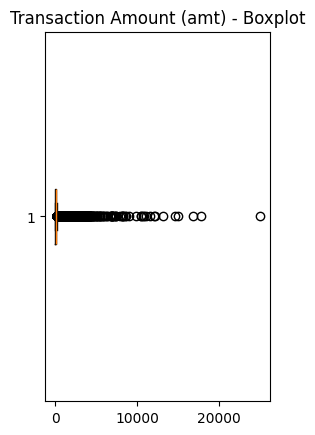

In [12]:
# 시각화

plt.Figure(figsize=(18,7)) # 그래프 크기 조절

# amt(거래금액) 
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 플롯
plt.boxplot(card_df['amt'], vert=False)  # 가로 방향 박스플롯
plt.title('Transaction Amount (amt) - Boxplot')  # 제목 추가 

plt.show()

## 

## 거래금액 

- 거래금액의 분포가 비대칭, 대부분 거래가 소액이지만, 일부 큰 거래가 있음  

  이상치들이 사기거래와 관련있는지 파악해봐야 함 

# 어떤 금액 구간에서 사기가 많이 일어나나 찾아보기 

In [13]:
# 사기 거래 비율
card_df['is_fraud'].mean()

0.0025329136243876418

### 사기 거래 비율이 전체의 0.25%로 낮음 

이러면 머신러닝 모델이 학습하기 어려울 수 있음 

[데이터 분균형 문제 해결방법]

1. 언더샘플링 

2. 오버샘플링 

3. 클래스 가중치 적용 

아래에서 이중 하나를 선택해서 해결 

In [14]:
# 거래 금액과 사기 거래 분석 
# 정상거래 0과 사기거래 1 
card_df.groupby('is_fraud')['amt'].mean() # 'is_fraud' 0과 1의 amt 평균 

is_fraud
0     68.011761
1    477.958328
Name: amt, dtype: float64

### 사기 친 거래 금액이 다소 높은 금액에서 발생하는 경향이 있다는 것을 파악

[알 수 있는 것]

1. 거래 금액이 클수록 사기일 가능성이 높음 

2. 머신러닝 시 거래금액이 일정 금액 이상이면 사기 가능성이 높다라는 패턴을 학습시킬 수 있을거 같음

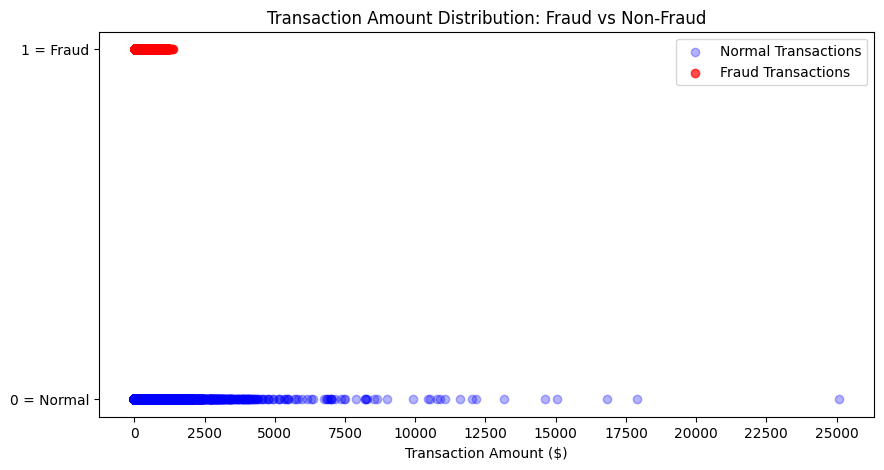

In [15]:
# 시각화 

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 정상 거래 (`is_fraud=0`)의 거래 금액 분포 (파란색)
plt.scatter(card_df[card_df['is_fraud'] == 0]['amt'], 
             card_df[card_df['is_fraud'] == 0]['is_fraud'],
             color='blue',  
             label='Normal Transactions',  
             alpha=0.3)

# 사기 거래 (`is_fraud=1`)의 거래 금액 분포 (빨간색)
plt.scatter(card_df[card_df['is_fraud'] == 1]['amt'], 
             card_df[card_df['is_fraud'] == 1]['is_fraud'],
             color='red',  
             label='Fraud Transactions',  
             alpha=0.7)
# x축 눈금 조정 
plt.xticks(np.arange(0,25001,2500))

# y축 눈금 조정
plt.yticks([0,1], ['0 = Normal', '1 = Fraud']) 


# 그래프 제목 및 라벨 설정
plt.legend()
plt.title('Transaction Amount Distribution: Fraud vs Non-Fraud')
plt.xlabel('Transaction Amount ($)')

# 그래프 출력
plt.show()



### $2,500 이하에서 사기거래가 많이 발상하는 것으로 파악됨 

In [16]:
# 사기거래 최대값 보기 
card_df[card_df['is_fraud'] == 1].nlargest(1, 'amt')


,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
135833,2019-08-10 22:10:23,fraud_Metz-Boehm,shopping_pos,1371.81,M,0110 Ashley Forest,Tekoa,WA,99033,47.2271,-117.0819,895,1999-05-31,1344636623,47.065996,-116.262297,1


## 가맹점 별 사기 거래율 분석 

가맹점 별 총 거래수와 사기거래 수 계산 

(사기거래수/총거래수) * 100

사기 거래율이 가장 높은 가맹점 top 10 찾기 

아마 막대그래프로 시각화? 

In [17]:
# 각 가맹점별 총 거래 수 & 사기 거래 수 계산
merchant_st = card_df.groupby('merchant')['is_fraud'].agg(
    total_transactions = "count", # 총 거래 수
    fraud_transactions = 'sum' # 사기 거래 수 
).reset_index()

In [18]:
# 사기 거래율 계산 
merchant_st["fraud_rate"] = (merchant_st['fraud_transactions']/merchant_st['total_transactions'])*100

In [19]:
top_ten = merchant_st.sort_values('fraud_rate',ascending = False).head(10)

In [20]:
top_ten

,merchant,total_transactions,fraud_transactions,fraud_rate
428,"fraud_Moen, Reinger and Murphy",829,11,1.326900
36,fraud_Bednar Group,466,6,1.287554
335,fraud_Kovacek Ltd,258,3,1.162791
198,"fraud_Gottlieb, Considine and Schultz",784,9,1.147959
372,"fraud_Langworth, Boehm and Gulgowski",788,9,1.142132
6,"fraud_Altenwerth, Cartwright and Koss",794,9,1.133501
678,fraud_Wolf Inc,809,9,1.112485
27,fraud_Bashirian Group,763,8,1.048493
302,"fraud_Kerluke, Considine and Macejkovic",489,5,1.022495
194,"fraud_Goldner, Kovacek and Abbott",886,9,1.015801


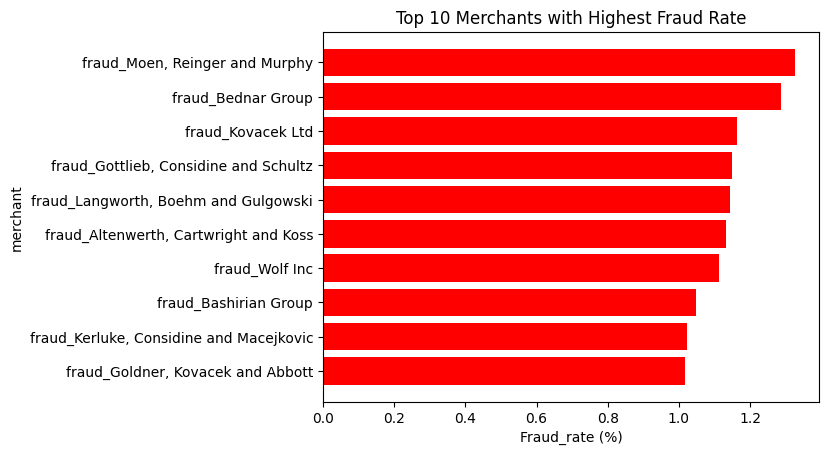

In [21]:
# 시각화 - 사기 거래율이 높은 가맹점 막대그래프

plt.Figure(figsize=(12,6))
plt.barh(top_ten['merchant'], top_ten['fraud_rate'], color = "red")
plt.xlabel('Fraud_rate (%)')
plt.ylabel("merchant")
plt.title("Top 10 Merchants with Highest Fraud Rate")
plt.gca().invert_yaxis() # 높은 값이 위로 가도록 설정 
plt.show()

### 그래프를 보면 사기율은 낮지만 fraud_Moen에서 가장 많음 

그럼 이 가맹점들이 특정 지역에 모여 있을수도 있음 

### 사기 거래율이 높은 가맹점들의 위치를 지도(Folium)에서 시각화

In [22]:
# 지도로 시각화 
# 가맹점별 평균 위도(lat) & 경도(long) 계산 (같은 가맹점이라도 위치가 조금 다를 수 있음)
merchant_location = card_df.groupby("merchant")[["merch_lat", "merch_long"]].mean().reset_index()

# 기존의 merchant_st 데이터프레임과 병합 (사기 거래율 포함)
merchant_st = merchant_st.merge(merchant_location, on="merchant", how="left")

import folium

# 1️⃣ 사기 거래율 추가
merchant_st["fraud_rate"] = (merchant_st["fraud_transactions"] / merchant_st["total_transactions"]) * 100

# 2️⃣ 사기 거래율이 높은 가맹점 Top 10 선택
top_fraud_merchants = merchant_st.sort_values("fraud_rate", ascending=False).head(10)

# 3️⃣ 지도 생성 (초기 위치는 첫 번째 가맹점의 위치)
map_center = [top_fraud_merchants["merch_lat"].iloc[0], top_fraud_merchants["merch_long"].iloc[0]]
fraud_map = folium.Map(location=map_center, zoom_start=6, tiles="OpenStreetMap")

# 4️⃣ 각 가맹점의 위치를 지도에 추가
for name, lat, lng, fraud_rate in zip(top_fraud_merchants["merchant"], 
                                      top_fraud_merchants["merch_lat"], 
                                      top_fraud_merchants["merch_long"], 
                                      top_fraud_merchants["fraud_rate"]):
    folium.CircleMarker(
        location=[lat, lng],   # 위도(lat), 경도(long)
        radius=fraud_rate * 2,  # 사기 거래율이 높을수록 원을 크게 설정
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f"{name}<br>Fraud Rate: {fraud_rate:.2f}%"  # 팝업 (가맹점 이름 & 사기율)
    ).add_to(fraud_map)

# 5️⃣ 지도 출력
fraud_map

### 사기 거래율이 높은 가맹점들이 미국 내 특정 지역에 분포 

일부 가맹점이 서로 가까운 위치에 몰려 있음 -> 사기 거래가 특정 지역에 집중될 가능성이 있음

## 사기 거래 지도 시각화

In [23]:

# 1️⃣ 사기 거래 데이터만 필터링
fraud_df = card_df[card_df["is_fraud"] == 1]

# 2️⃣ 지도 초기 설정 (사기 거래가 가장 많이 발생한 첫 번째 가맹점 중심)
map_center = [fraud_df["merch_lat"].iloc[0], fraud_df["merch_long"].iloc[0]]
fraud_map = folium.Map(location=map_center, zoom_start=6, tiles="OpenStreetMap")

# 3️⃣ 사기 거래 위치를 지도에 추가 (빨간색)
for lat, lng in zip(fraud_df["merch_lat"], fraud_df["merch_long"]):
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(fraud_map)

# 4️⃣ 지도 출력
fraud_map

### 현재 미국 동부 및 중부 지역을 중심으로 사기 거래(빨간색 점)가 광범위하게 발생

하지만, 특정 도시나 특정 구역에서 더 많이 발생하는지 명확하지 않음

## 특징 엔지니어링 

### 대도시 여부(is_large_city) 추가

In [24]:
card_df['is_large_city'] = (card_df['city_pop'] >= 500000).astype(int)
print(card_df[['city_pop', 'is_large_city']].head(50))  # 10개만 확인


    city_pop  is_large_city
0        149              0
1     124967              0
2      71485              0
3      31515              0
4     378909              0
5      34496              0
6      19685              0
7        242              0
8         46              0
9         85              0
10        46              0
11      3224              0
12       743              0
13       328              0
14       111              0
15    320420              0
16      4542              0
17       372              0
18      1523              0
19     19054              0
20     71485              0
21     46563              0
22       725              0
23      1970              0
24      1089              0
25    190178              0
26      7646              0
27      6841              0
28   1526206              1
29      1512              0
30      4056              0
31      2368              0
32    128715              0
33     20478              0
34    276896        

### 카드 소유자와 가맹점 사이 거리(distance_to_merchant) 추가

In [25]:
import numpy as np

# 하버사인 공식 함수 정의
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 지구 반지름 (단위: km)
    
    # 라디안 단위로 변환
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # 위도 및 경도의 차이 계산
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # 하버사인 공식 적용
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c  # 최종 거리 (단위: km)

# 거리 계산하여 새로운 컬럼 생성
card_df['distance_to_merchant'] = haversine(card_df['lat'], card_df['long'], card_df['merch_lat'], card_df['merch_long'])

# 확인
print(card_df[['lat', 'long', 'merch_lat', 'merch_long', 'distance_to_merchant']].head())


       lat      long  merch_lat  merch_long  distance_to_merchant
0  48.8878 -118.2105  49.159047 -118.186462             30.212176
1  40.6747  -74.2239  40.079588  -74.848087             84.702120
2  40.6152  -74.4150  40.021888  -74.228188             67.847742
3  42.2203  -83.3583  42.360426  -83.552316             22.303906
4  30.4066  -91.1468  29.737426  -90.853194             79.591943


# 회고록

이제 여기까진 헀는데 머신러닝 어떤식으로 해야 될지 감이 안잡힙니다... 복습이 필요한거 같아요 일단 그리고 그래프 그리는게 꽤 힘이 들었습니다 